In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import mdtraj as md

import torch

from snrv import Snrv

In [2]:
traj = md.load("../traj_2000_2500.dcd", top="../aib9.gro")
biasing_atom_ids = np.array([atom.index for atom in traj.topology.atoms if atom.residue.name != 'HOH'])
pos = torch.from_numpy(traj.xyz)
box = torch.from_numpy(np.asarray([np.diag(i) for i in traj.unitcell_vectors])).view(-1, 1, 3)

In [3]:
def generate_pair_indices_from_list(index_list):
    i_list = []
    j_list = []
    for i in range(len(index_list)):
        for j in range(i + 1, len(index_list)):
            i_list.append(index_list[i])
            j_list.append(index_list[j])
    return torch.tensor(i_list), torch.tensor(j_list)

i_list, j_list = generate_pair_indices_from_list(biasing_atom_ids)

In [4]:
d = pos[:, i_list, :] - pos[:, j_list, :]  # shape: [T, M, 3]
d = d - box * torch.round(d / box)  # apply MIC
traj_x = torch.norm(d, dim=-1)  # shape: [T, M]

In [8]:
input_size = traj_x.size()[1]
output_size = 3
hidden_depth = 3
hidden_size = 2000
batch_norm = True
dropout_rate = 0.
lr = 1E-4
weight_decay = 0.
val_frac = 0.20
n_epochs = 50
batch_size = 1000
VAMPdegree = 2
is_reversible = True
num_workers = 0

model = Snrv(input_size, output_size, hidden_depth=hidden_depth, hidden_size=hidden_size,
            batch_norm=batch_norm, dropout_rate=dropout_rate, lr=lr, weight_decay=weight_decay, 
            val_frac=val_frac, n_epochs=n_epochs, batch_size=batch_size, 
            VAMPdegree=VAMPdegree, is_reversible=is_reversible, num_workers=num_workers, device="cuda")
model = model.to("cuda")

In [9]:
lag = 1
model.fit(traj_x, lag)
model.save_model(f'snrv_{lag}.pt')

Epoch 0: 100%|██████████| 8/8 [00:00<00:00,  9.92batch/s]


[Epoch 0]	 training loss = -2.597	 validation loss = -2.726


Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 13.40batch/s]


[Epoch 1]	 training loss = -2.811	 validation loss = -2.779


Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 13.09batch/s]


[Epoch 2]	 training loss = -2.876	 validation loss = -2.837


Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 13.33batch/s]


[Epoch 3]	 training loss = -2.922	 validation loss = -2.877


Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 13.10batch/s]


[Epoch 4]	 training loss = -2.947	 validation loss = -2.899


Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 11.49batch/s]


[Epoch 5]	 training loss = -2.963	 validation loss = -2.910


Epoch 6: 100%|██████████| 8/8 [00:00<00:00, 13.89batch/s]


[Epoch 6]	 training loss = -2.973	 validation loss = -2.919


Epoch 7: 100%|██████████| 8/8 [00:00<00:00, 13.12batch/s]


[Epoch 7]	 training loss = -2.980	 validation loss = -2.926


Epoch 8: 100%|██████████| 8/8 [00:00<00:00, 13.42batch/s]


[Epoch 8]	 training loss = -2.984	 validation loss = -2.934


Epoch 9: 100%|██████████| 8/8 [00:00<00:00, 12.99batch/s]


[Epoch 9]	 training loss = -2.988	 validation loss = -2.939


Epoch 10: 100%|██████████| 8/8 [00:00<00:00, 12.88batch/s]


[Epoch 10]	 training loss = -2.991	 validation loss = -2.940


Epoch 11: 100%|██████████| 8/8 [00:00<00:00, 13.61batch/s]


[Epoch 11]	 training loss = -2.992	 validation loss = -2.942


Epoch 12: 100%|██████████| 8/8 [00:00<00:00, 14.13batch/s]


[Epoch 12]	 training loss = -2.994	 validation loss = -2.943


Epoch 13: 100%|██████████| 8/8 [00:00<00:00, 14.37batch/s]


[Epoch 13]	 training loss = -2.995	 validation loss = -2.943


Epoch 14: 100%|██████████| 8/8 [00:00<00:00, 14.68batch/s]


[Epoch 14]	 training loss = -2.995	 validation loss = -2.943


Epoch 15: 100%|██████████| 8/8 [00:00<00:00, 13.98batch/s]


[Epoch 15]	 training loss = -2.996	 validation loss = -2.946


Epoch 16: 100%|██████████| 8/8 [00:00<00:00, 13.69batch/s]


[Epoch 16]	 training loss = -2.997	 validation loss = -2.946


Epoch 17: 100%|██████████| 8/8 [00:00<00:00, 14.87batch/s]


[Epoch 17]	 training loss = -2.997	 validation loss = -2.945


Epoch 18: 100%|██████████| 8/8 [00:00<00:00, 14.59batch/s]


[Epoch 18]	 training loss = -2.997	 validation loss = -2.947


Epoch 19: 100%|██████████| 8/8 [00:00<00:00, 12.62batch/s]


[Epoch 19]	 training loss = -2.997	 validation loss = -2.946


Epoch 20: 100%|██████████| 8/8 [00:00<00:00, 14.41batch/s]


[Epoch 20]	 training loss = -2.998	 validation loss = -2.945


Epoch 21: 100%|██████████| 8/8 [00:00<00:00, 14.66batch/s]


[Epoch 21]	 training loss = -2.998	 validation loss = -2.947


Epoch 22: 100%|██████████| 8/8 [00:00<00:00, 14.61batch/s]


[Epoch 22]	 training loss = -2.998	 validation loss = -2.948


Epoch 23: 100%|██████████| 8/8 [00:00<00:00, 14.89batch/s]


[Epoch 23]	 training loss = -2.998	 validation loss = -2.949


Epoch 24: 100%|██████████| 8/8 [00:00<00:00, 14.40batch/s]


[Epoch 24]	 training loss = -2.998	 validation loss = -2.947


Epoch 25: 100%|██████████| 8/8 [00:00<00:00, 14.86batch/s]


[Epoch 25]	 training loss = -2.998	 validation loss = -2.947


Epoch 26: 100%|██████████| 8/8 [00:00<00:00, 12.67batch/s]


[Epoch 26]	 training loss = -2.998	 validation loss = -2.948


Epoch 27: 100%|██████████| 8/8 [00:00<00:00, 14.77batch/s]


[Epoch 27]	 training loss = -2.998	 validation loss = -2.949


Epoch 28: 100%|██████████| 8/8 [00:00<00:00, 14.66batch/s]


[Epoch 28]	 training loss = -2.998	 validation loss = -2.950


Epoch 29: 100%|██████████| 8/8 [00:00<00:00, 14.41batch/s]


[Epoch 29]	 training loss = -2.998	 validation loss = -2.950


Epoch 30: 100%|██████████| 8/8 [00:00<00:00, 14.46batch/s]


[Epoch 30]	 training loss = -2.998	 validation loss = -2.950


Epoch 31: 100%|██████████| 8/8 [00:00<00:00, 14.60batch/s]


[Epoch 31]	 training loss = -2.999	 validation loss = -2.951


Epoch 32: 100%|██████████| 8/8 [00:00<00:00, 14.14batch/s]


[Epoch 32]	 training loss = -2.999	 validation loss = -2.952


Epoch 33: 100%|██████████| 8/8 [00:00<00:00, 14.53batch/s]


[Epoch 33]	 training loss = -2.999	 validation loss = -2.951


Epoch 34: 100%|██████████| 8/8 [00:00<00:00, 13.24batch/s]


[Epoch 34]	 training loss = -2.999	 validation loss = -2.952


Epoch 35: 100%|██████████| 8/8 [00:00<00:00, 13.09batch/s]


[Epoch 35]	 training loss = -2.999	 validation loss = -2.952


Epoch 36: 100%|██████████| 8/8 [00:00<00:00, 12.87batch/s]


[Epoch 36]	 training loss = -2.999	 validation loss = -2.953


Epoch 37: 100%|██████████| 8/8 [00:00<00:00, 12.97batch/s]


[Epoch 37]	 training loss = -2.999	 validation loss = -2.953


Epoch 38: 100%|██████████| 8/8 [00:00<00:00, 13.64batch/s]


[Epoch 38]	 training loss = -2.999	 validation loss = -2.952


Epoch 39: 100%|██████████| 8/8 [00:00<00:00, 13.14batch/s]


[Epoch 39]	 training loss = -2.999	 validation loss = -2.952


Epoch 40: 100%|██████████| 8/8 [00:00<00:00, 12.80batch/s]


[Epoch 40]	 training loss = -2.999	 validation loss = -2.953


Epoch 41: 100%|██████████| 8/8 [00:00<00:00, 11.29batch/s]


[Epoch 41]	 training loss = -2.999	 validation loss = -2.953


Epoch 42: 100%|██████████| 8/8 [00:00<00:00, 12.95batch/s]


[Epoch 42]	 training loss = -2.999	 validation loss = -2.954


Epoch 43: 100%|██████████| 8/8 [00:00<00:00, 13.49batch/s]


[Epoch 43]	 training loss = -2.999	 validation loss = -2.954


Epoch 44: 100%|██████████| 8/8 [00:00<00:00, 12.92batch/s]


[Epoch 44]	 training loss = -2.999	 validation loss = -2.954


Epoch 45: 100%|██████████| 8/8 [00:00<00:00, 13.19batch/s]


[Epoch 45]	 training loss = -2.999	 validation loss = -2.955


Epoch 46: 100%|██████████| 8/8 [00:00<00:00, 13.83batch/s]


[Epoch 46]	 training loss = -2.999	 validation loss = -2.955


Epoch 47: 100%|██████████| 8/8 [00:00<00:00, 13.06batch/s]


[Epoch 47]	 training loss = -2.999	 validation loss = -2.956


Epoch 48: 100%|██████████| 8/8 [00:00<00:00, 11.45batch/s]


[Epoch 48]	 training loss = -2.999	 validation loss = -2.955


Epoch 49: 100%|██████████| 8/8 [00:00<00:00, 13.62batch/s]


[Epoch 49]	 training loss = -2.999	 validation loss = -2.956


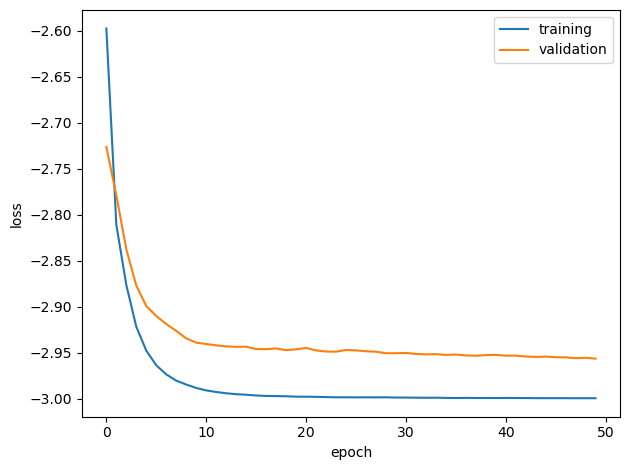

In [10]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(model.training_losses)), model.training_losses)
ax.plot(np.arange(len(model.validation_losses)), model.validation_losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['training','validation'])
fig.tight_layout()

In [11]:
evecs_SRV_unbiased = model.transform(traj_x.float()).cpu().detach().numpy()

In [12]:
dataset = pd.DataFrame(evecs_SRV_unbiased, columns=["TIC0", "TIC1", "TIC2"])
px.scatter(dataset, x="TIC1", y="TIC2", width=600, height=600)

In [13]:
print(dataset.max())
print(dataset.min())

TIC0     2.788397
TIC1    11.721638
TIC2    10.251656
dtype: float32
TIC0     0.895375
TIC1    -1.910913
TIC2   -11.985732
dtype: float32


In [ ]:
class CV(torch.nn.Module):
    def __init__(self, model, idx):
        super().__init__()
        self.model = model
        self.idx = idx
        self.register_buffer("i_list", i_list)
        self.register_buffer("j_list", j_list)

    def forward(self, positions, boxvectors):
        """The forward method returns the energy computed from positions.

        Parameters
        ----------
        positions : torch.Tensor with shape (nparticles, 3)
           positions[i,k] is the position (in nanometers) of spatial dimension k of particle i

        Returns
        -------
        potential : torch.Scalar
           The potential energy (in kJ/mol)
        """
        boxsize = boxvectors.diag()
        d = positions[self.i_list, :] - positions[self.j_list, :]  # shape: [M, 3]
        d = d - boxsize * torch.round(d / boxsize)  # apply MIC
        feats = torch.norm(d, dim=-1)  # shape: [T, M]
        evecs = self.model.transform(feats.view(1, -1))
        CV = evecs[0][self.idx]
        return CV

model_output_1 = CV(model, 1)
model_output_2 = CV(model, 2)

torch.jit.script(model_output_1).save('cv1.pt')
torch.jit.script(model_output_2).save('cv2.pt')

: 